In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
conf_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
model = "frozen_inference_graph.pb"

In [3]:
cvmodel = cv2.dnn_DetectionModel(conf_file, model)

In [4]:
cvmodel

< cv2.dnn.DetectionModel 0000022B744E79D0>

In [5]:
labels = []
file_name = "labels.txt"
with open(file_name, 'rt') as fpt:
    labels = fpt.read().rstrip().split('\n')


In [6]:
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
len(labels)

80

In [8]:
cvmodel.setInputSize(360, 360)
cvmodel.setInputScale(1.0/150.5)
cvmodel.setInputMean((150.5, 150, 10, 150.5))
cvmodel.setInputSwapRB(True)

< cv2.dnn.Model 0000022B744E7F30>

# Read Image file

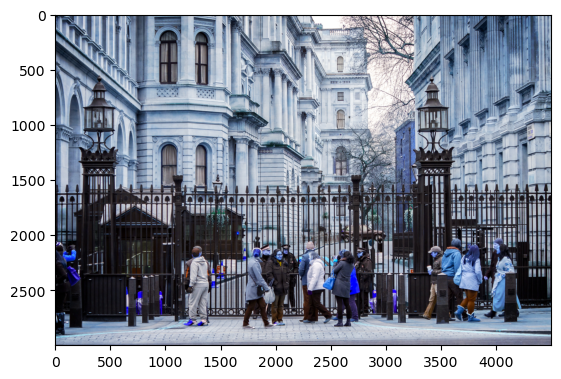

In [9]:
img = cv2.imread('Downing_Street_gates.jpg',cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [10]:
ClassInd, confidence, bbox = cvmodel.detect(img, confThreshold = 0.35)

In [11]:
ClassInd

array([ 1,  1,  1,  1,  1,  1,  1, 31, 31, 31,  1, 31,  1,  1, 31, 10, 28,
        1, 10,  1, 31, 31, 31, 27,  1,  1,  1, 27, 31, 31, 31,  1, 31,  1,
       28,  1,  1, 31,  1,  1, 27,  1,  1,  1, 28])

In [12]:
confidence

array([0.75535876, 0.69111216, 0.68823564, 0.6780386 , 0.6559249 ,
       0.6376136 , 0.6305675 , 0.5307808 , 0.52040046, 0.49390677,
       0.47245035, 0.46847653, 0.46661997, 0.4601972 , 0.45846733,
       0.44486475, 0.4325557 , 0.42978448, 0.42245543, 0.4220305 ,
       0.41918117, 0.4123558 , 0.40133134, 0.3997516 , 0.39625818,
       0.395288  , 0.39485377, 0.3875535 , 0.38733146, 0.38621256,
       0.3850284 , 0.38440597, 0.38117373, 0.3791439 , 0.37312117,
       0.37010372, 0.36980966, 0.36940873, 0.367985  , 0.36287868,
       0.3626859 , 0.3591827 , 0.35202548, 0.35200393, 0.35049874],
      dtype=float32)

In [13]:
bbox

array([[3418, 2106,  368,  722],
       [3879, 2078,  351,  732],
       [2490, 2161,  327,  679],
       [1839, 2126,  328,  738],
       [3519, 2092,  455,  722],
       [2298, 2165,  308,  659],
       [1182, 2097,  321,  735],
       [2542, 2277,  156,  274],
       [2357, 2246,  168,  301],
       [1987, 2225,  171,  307],
       [2612, 2132,  293,  674],
       [2727, 2227,  162,  396],
       [  26, 2146,  330,  762],
       [2016, 2183,  131,  191],
       [1817, 2281,  143,  243],
       [ 195, 2134,   98,  119],
       [2354, 2209,  151,  222],
       [2357, 2246,  168,  301],
       [ 204, 2191,  112,  166],
       [2193, 2191,  102,  177],
       [1839, 2452,  147,  190],
       [3718, 2303,  145,  209],
       [3915, 2223,  168,  411],
       [2016, 2183,  131,  191],
       [3404, 2158,  137,  212],
       [2354, 2209,  151,  222],
       [2014, 2148,   85,   99],
       [2542, 2277,  156,  274],
       [1451, 2277,  103,  209],
       [2202, 2222,  129,  387],
       [39

# Adding rectangle box and font

In [14]:
font = cv2.FONT_HERSHEY_PLAIN
for CI, conf, boxes in zip(ClassInd.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, labels[CI-1],(boxes[0]+10,boxes[1]+40), font, fontScale = 3, color=(255,0,0), thickness= 3)

# Plotting the Image and results

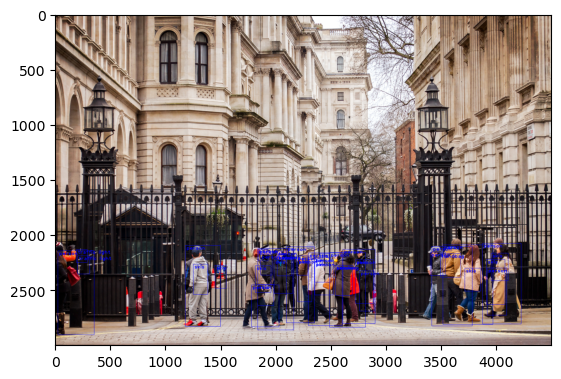

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Live Webcam detection

In [16]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Define font and font scale for text overlay
font = cv2.FONT_HERSHEY_PLAIN
font_scale = 1

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break
    
    # Perform object detection on the frame
    # Assuming model.detect() returns ClassIndex, Confidence, and bbox
    ClassIndex, Confidence, bbox = cvmodel.detect(frame, confThreshold=0.40)
    
    # Display detection results on the frame
    if len(ClassIndex) != 0:
        for CI, conf, boxes in zip(ClassIndex.flatten(), Confidence.flatten(), bbox):
            if CI <= 80:  # Assuming CI represents class index
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, labels[CI - 1], (boxes[0], boxes[1] - 10), font, fontScale=font_scale, color=(255, 0, 0), thickness=1)
    
    # Show the frame with object detection
    cv2.imshow('Object Detection', frame)
    
    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


# Live phone cam detection

In [ ]:
# Initialize the camera capture object using DroidCam IP address
droidcam_ip = "192.168.14.139"  # Replace with the IP address displayed in DroidCam app
cap = cv2.VideoCapture(f"http://{droidcam_ip}:4747/video")

# Check if the camera is opened successfully
if not cap.isOpened():
    raise IOError("Cannot open DroidCam")

# Define font and font scale for text overlay
font = cv2.FONT_HERSHEY_PLAIN
font_scale = 1

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break
    
    # Perform object detection on the frame
    # Assuming model.detect() returns ClassIndex, Confidence, and bbox
    ClassIndex, Confidence, bbox = cvmodel.detect(frame, confThreshold=0.50)
    
    # Display detection results on the frame
    if len(ClassIndex) != 0:
        for CI, conf, boxes in zip(ClassIndex.flatten(), Confidence.flatten(), bbox):
            if CI <= 80:  # Assuming CI represents class index
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, labels[CI - 1], (boxes[0], boxes[1] - 10), font, fontScale=font_scale, color=(255, 0, 0), thickness=1)
    
    # Show the frame with object detection
    cv2.imshow('Object Detection', frame)
    
    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()
